# ***GETTING STARTING WITH IMAGES***




In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image,display

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [4]:
# Display 18x18 pixel image.
Image(filename="checkerboard_18x18.png")

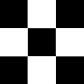

In [5]:
# Display 84x84 pixel image.
Image(filename="checkerboard_84x84.jpg")

# Reading Images with Opencv

#### cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode
#### cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
#### cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.

In [12]:
cb_img = cv2.imread('checkerboard_18x18.png',0)
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [17]:
print("Image dimensions:",cb_img.shape)
print("Image datatype:",type(cb_img))

Image dimensions: (18, 18)
Image datatype: <class 'numpy.ndarray'>


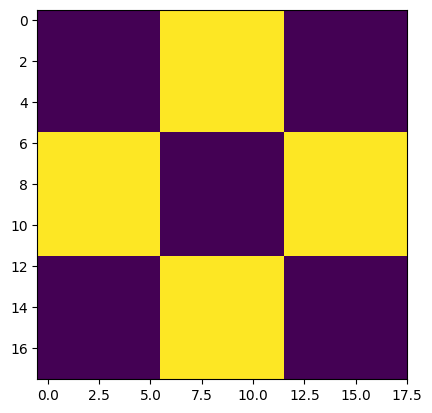

In [18]:
# Display image with matplotlib
plt.imshow(cb_img)

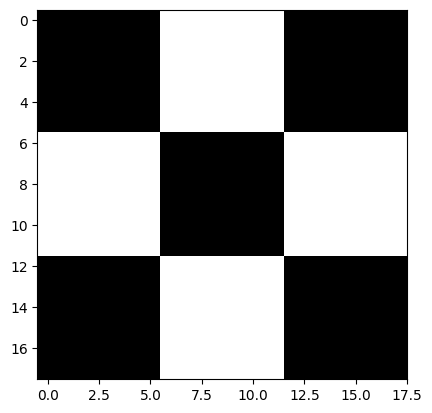

In [19]:
# even though opencv read the image as grayscale, the matplotlib will use different colorscale
# when using imshow(). so we need to define it in colormap(cmap)
plt.imshow(cb_img,cmap='gray')

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

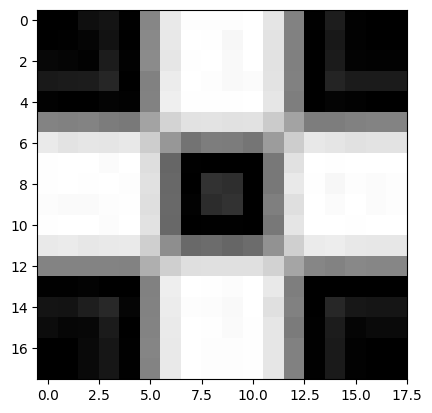

In [23]:
cb_fuzzy_img = cv2.imread('checkerboard_fuzzy_18x18.jpg',0)
print(cb_fuzzy_img)
plt.imshow(cb_fuzzy_img,cmap='gray')
print(cb_fuzzy_img.shape)

# Working with images with colors


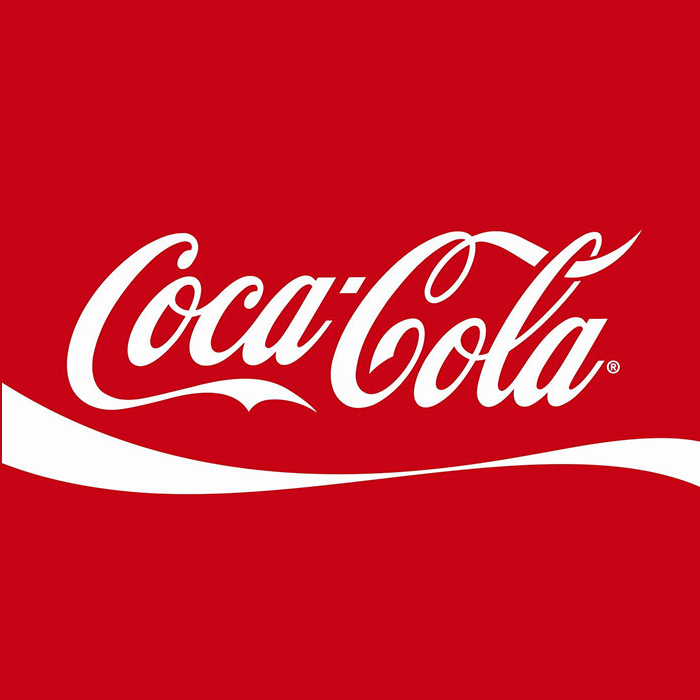

In [29]:
# Read and display Coca-Cola logo.
Image('coca-cola-logo.png')

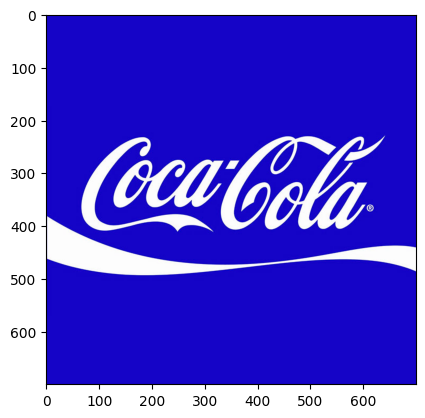

In [37]:
cola_img = cv2.imread('coca-cola-logo.png',1)
plt.imshow(cola_img)
#this happens bcz, the color format order of opencv is BGR and matplotlib expects RGB

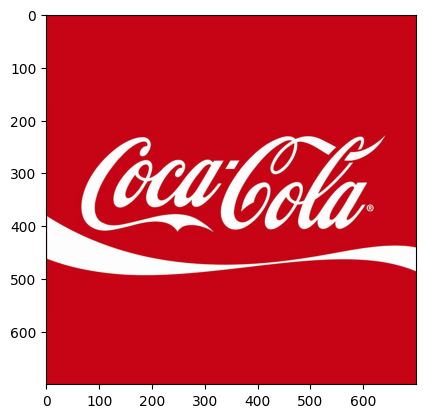

In [39]:
# we need to reverse the color order
cola_img_channels_reversed = cola_img[:,:,::-1]
plt.imshow(cola_img_channels_reversed)

# Splitting and Merging channels of images

Text(0.5, 1.0, 'Merged image')

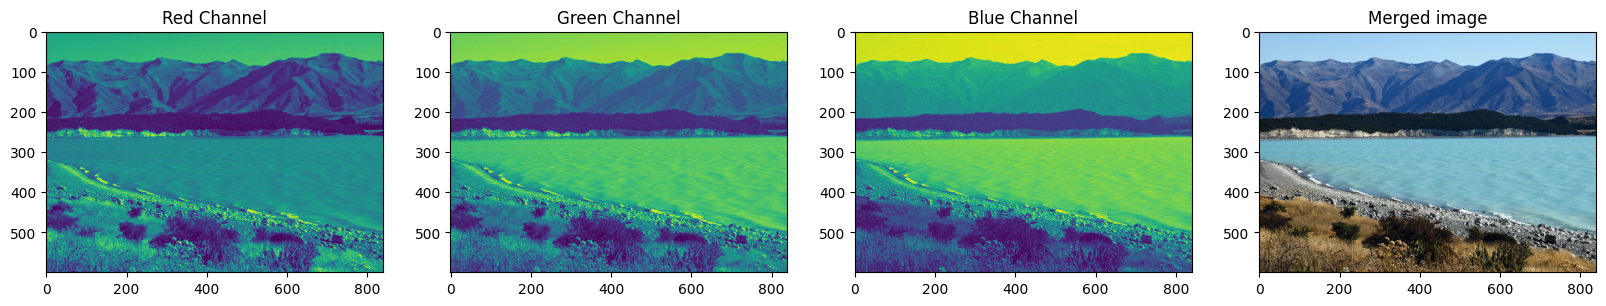

In [42]:
# cv2.split() Divides a multi-channel array into several single-channel arrays.
# cv2.merge() Merges several arrays to make a single multi-channel array.
# All the input matrices must have the same size.
NZ_img_bgr = cv2.imread('New_Zealand_Lake.jpg',1)
b,g,r = cv2.split(NZ_img_bgr)
#now we splitter the img into 3 channels in the order blue,green,red bcz opencv
#takes the order bgr

#plotting images
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r);plt.title('Red Channel')
plt.subplot(142);plt.imshow(g);plt.title('Green Channel')
plt.subplot(143);plt.imshow(b);plt.title('Blue Channel')

#merging images in bgr format
merged_img = cv2.merge((b,g,r))
plt.subplot(144);plt.imshow(merged_img[:,:,::-1]);plt.title('Merged image')


# converting to different color spaces

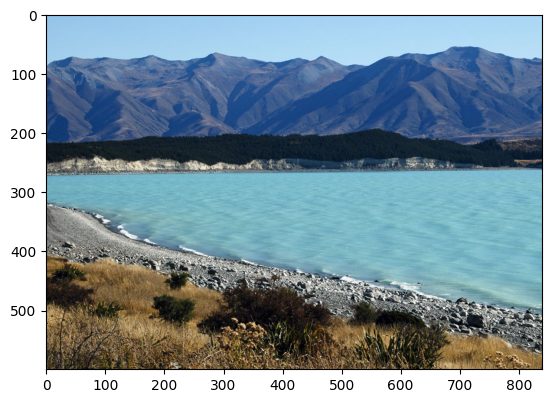

In [43]:
NZ_img_rgb = cv2.cvtColor(NZ_img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(NZ_img_rgb)

# Changing to HSV color space

Text(0.5, 1.0, 'Original')

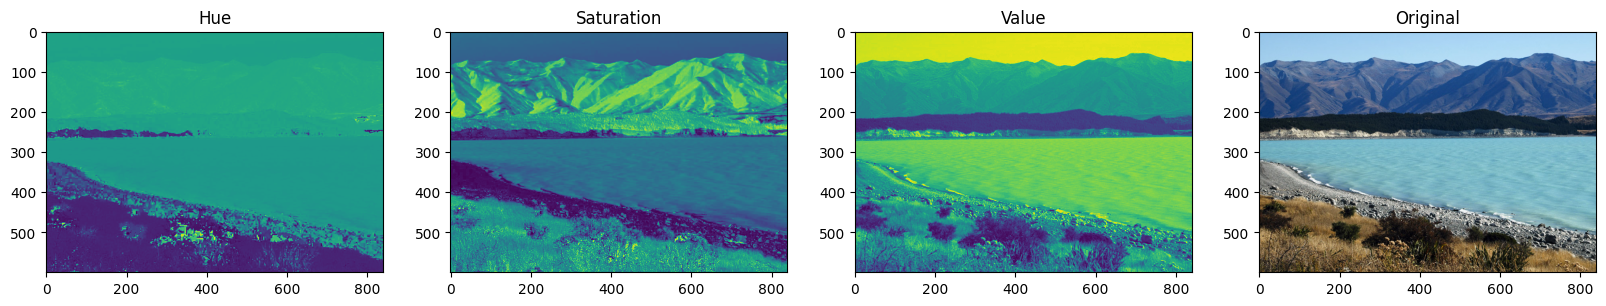

In [46]:
NZ_img_hsv = cv2.cvtColor(NZ_img_bgr,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(NZ_img_hsv)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h);plt.title('Hue')
plt.subplot(142);plt.imshow(s);plt.title('Saturation')
plt.subplot(143);plt.imshow(v);plt.title('Value')
plt.subplot(144);plt.imshow(NZ_img_rgb);plt.title('Original')

# modifying individual channels

Text(0.5, 1.0, 'Original')

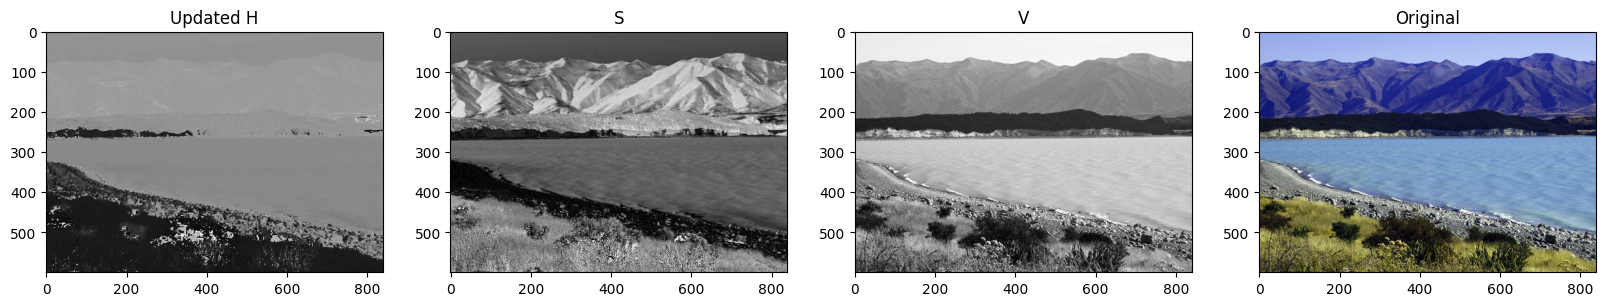

In [48]:
h_new = h+10
NZ_img_merge=cv2.merge((h_new,s,v))
NZ_img_rgb2=cv2.cvtColor(NZ_img_merge,cv2.COLOR_HSV2RGB)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h_new,cmap='gray');plt.title('Updated H')
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title('S')
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title('V')
plt.subplot(144);plt.imshow(NZ_img_rgb2);plt.title('Original')

# Saving an image

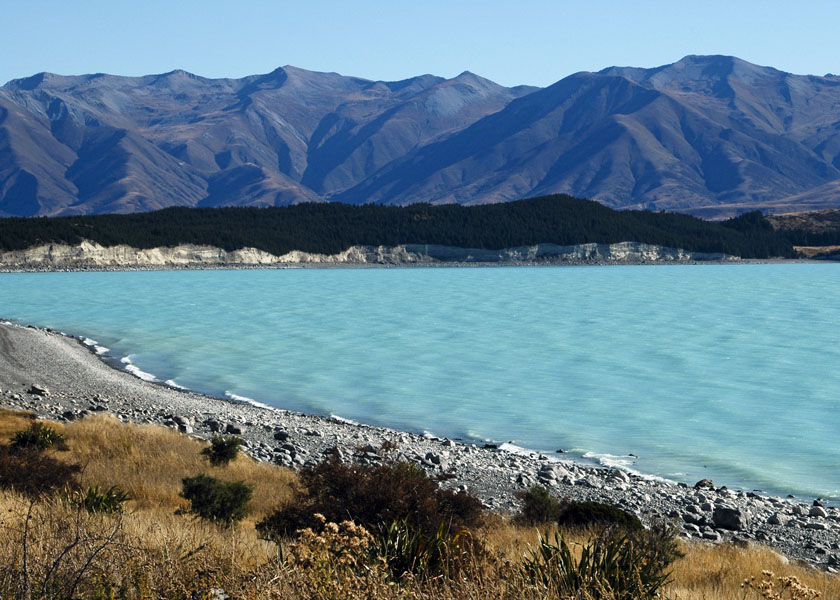

In [51]:
cv2.imwrite('New_Zealand_Lake_SAVED.png',NZ_img_bgr)
Image(filename='New_Zealand_Lake_SAVED.png')